<a href="https://colab.research.google.com/github/frnkly/jayne-eats/blob/main/ml/notes/model-exploration-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Exploration using TensorFlow



# Data

In [44]:
# Dataset, organized as: [classification, consistency, temperature, [ingredients]].
raw_dataset = [
  # Pizzas
  [False, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'oil', 'olive', 'onion', 'salt', 'sugar', 'tomato']], # Olives
  [False, 'solid', 'warm', ['anchovy', 'bell_pepper', 'cheese', 'flour', 'garlic', 'mayonnaise', 'oil', 'olive', 'onion', 'salt', 'spinach', 'sugar']], # Anchovies
  [False, 'solid', 'warm', ['apple', 'coriander', 'cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar']], # Apple & goat cheese
  [True, 'solid', 'warm', ['arugula', 'bell_pepper', 'cheese', 'coriander', 'flour', 'garlic', 'oil', 'onion', 'salt', 'spinach', 'sugar', 'tomato']], # Arugula
  [True, 'solid', 'warm', ['bell_pepper', 'cheese', 'flour', 'garlic', 'mushroom', 'oil', 'onion', 'salt', 'sugar']], # Mushroom
  [True, 'solid', 'warm', ['cheese', 'flour', 'garlic', 'oil', 'onion', 'salt', 'sugar', 'tomato']], # Cheese

  # Products
  # [True, 'crunchy', 'normal', ['anise', 'baking_powder', 'egg', 'flour', 'oil', 'sugar']], # Biscotti
  # [True, 'crunchy', 'cool', ['almond', 'barley_malt', 'milk', 'rice', 'salt', 'sugar', 'wheat_bran', 'whole_grain_wheat']], # Vanilla almond Special K

  # Smoothies & milkshakes
  [True, 'chewy', 'cool', ['cookies', 'milk', 'skim_milk', 'sugar', 'vanilla']], # Oreo ice cream
  [False, 'thick', 'cool', ['blueberry', 'pineapple', 'strawberry']],
  [False, 'thick', 'cool', ['blueberry', 'kiwi', 'strawberry']],
  [False, 'thick', 'cool', ['chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['banana', 'chocolate', 'milk', 'vanilla']],
  [False, 'thick', 'cool', ['milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['blueberry', 'kiwi', 'mango', 'pineapple']],
  [True, 'thick', 'cool', ['banana', 'milk', 'strawberry', 'vanilla']],
  [True, 'thick', 'cool', ['banana', 'milk', 'kiwi', 'vanilla']],

  # Soups & chilis
  [False, 'mashed', 'warm', ['bay_leaf', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'salt', 'tomato', 'tumeric']], # Chole chickpea curry
  [False, 'mashed', 'warm', ['black_pepper', 'chickpea', 'chili', 'coriander', 'cumin', 'garlic', 'ginger', 'oil', 'onion', 'potato', 'salt', 'spinach', 'tomato', 'tumeric']], # Sweet potato curry
  [True, 'mashed', 'warm', ['black_pepper', 'butter', 'cheese', 'coriander', 'garlic', 'potato', 'salt']], # Mash potatoes
  [True, 'mashed', 'warm', ['bean', 'black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'tomato', 'tumeric']], # Chili
  [False, 'liquid', 'warm', ['black_pepper', 'butter', 'flour', 'garlic', 'onion', 'peanut', 'salt']], # Peanut soup
  [True, 'thick', 'warm', ['black_pepper', 'carrot', 'chili', 'garlic', 'onion', 'potato', 'salt', 'squash']], # Butternut squash soup

  # Miscellaneous (stuff made out of ingredients from above)
  [True, 'crunchy', 'normal', ['almond', 'apple', 'arugula', 'cranberry', 'oil', 'salt']], # Arugula salad
  [True, 'solid', 'warm', ['black_pepper', 'cheese', 'egg', 'garlic', 'mushroom', 'oil', 'onion', 'red_pepper', 'salt', 'spinach']], # Mushroom spinach omelet
  [True, 'solid', 'warm', ['bean', 'black_pepper', 'oil', 'onion', 'rice', 'salt', 'tumeric']], # Rice and beans
  [True, 'solid', 'warm', ['black_pepper', 'mushroom', 'oil', 'onion', 'pea', 'rice', 'salt']], # Riz djondjon
  [True, 'solid', 'cool', ['banana', 'butter', 'egg', 'flour', 'milk', 'salt', 'strawberry']], # Crepes
  [False, 'solid', 'warm', ['black_pepper', 'oil', 'okra', 'onion', 'rice', 'salt', 'spinach']], # Kalalou
]

RAW_LABEL_COL = 0
RAW_CONSISTENCY_COL = 1
RAW_TEMPERATURE_COL = 2
RAW_INGREDIENTS_COL = 3

print('Size of data set:', len(raw_dataset))

Size of data set: 28


In [45]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

sns_colors = sns.color_palette('colorblind')


In [46]:
# Ingredients list.
ingredients_set = set()

for data in raw_dataset:
  ingredients_set |= set(data[RAW_INGREDIENTS_COL])

ingredients = sorted(list(ingredients_set))
print(f'Ingredients ({len(ingredients)}):', ingredients)

Ingredients (48): ['almond', 'anchovy', 'apple', 'arugula', 'banana', 'bay_leaf', 'bean', 'bell_pepper', 'black_pepper', 'blueberry', 'butter', 'carrot', 'cheese', 'chickpea', 'chili', 'chocolate', 'cookies', 'coriander', 'cranberry', 'cumin', 'egg', 'flour', 'garlic', 'ginger', 'kiwi', 'mango', 'mayonnaise', 'milk', 'mushroom', 'oil', 'okra', 'olive', 'onion', 'pea', 'peanut', 'pineapple', 'potato', 'red_pepper', 'rice', 'salt', 'skim_milk', 'spinach', 'squash', 'strawberry', 'sugar', 'tomato', 'tumeric', 'vanilla']


In [47]:
# Processed dataset.
processed_dataset = []
feature_names = ['consistency', 'temperature'] + ingredients

for data in raw_dataset:
  data_ingredients_set = set(data[RAW_INGREDIENTS_COL])
  processed_data = [data[RAW_CONSISTENCY_COL], data[RAW_TEMPERATURE_COL]]

  for ingredient in ingredients:
    processed_data.append(1 if ingredient in data_ingredients_set else 0)
  
  processed_data.append(1 if data[RAW_LABEL_COL] else 0)
  
  processed_dataset.append(processed_data)

dataset = pd.DataFrame(processed_dataset, columns=[*feature_names, 'label'])
dataset_labels = dataset.pop('label')

dataset.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
0,solid,warm,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1,solid,warm,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
2,solid,warm,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,solid,warm,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
4,solid,warm,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [48]:
# Split dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels)

print('Training set size:', y_train.size)
print('Testing set size:', y_test.size)

Training set size: 21
Testing set size: 7


In [49]:
# Training data.
tf.random.set_seed(90128)
X_train.head()

,consistency,temperature,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
21,thick,warm,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
17,mashed,warm,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
20,liquid,warm,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,thick,cool,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
10,thick,cool,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
X_train.describe()

,almond,anchovy,apple,arugula,banana,bay_leaf,bean,bell_pepper,black_pepper,blueberry,butter,carrot,cheese,chickpea,chili,chocolate,cookies,coriander,cranberry,cumin,egg,flour,garlic,ginger,kiwi,mango,mayonnaise,milk,mushroom,oil,okra,olive,onion,pea,peanut,pineapple,potato,red_pepper,rice,salt,skim_milk,spinach,squash,strawberry,sugar,tomato,tumeric,vanilla
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.047619,0.047619,0.047619,0.095238,0.190476,0.047619,0.095238,0.142857,0.380952,0.142857,0.142857,0.095238,0.238095,0.095238,0.190476,0.047619,0.0,0.190476,0.047619,0.095238,0.095238,0.238095,0.476190,0.095238,0.142857,0.047619,0.047619,0.238095,0.095238,0.428571,0.047619,0.047619,0.523810,0.0,0.047619,0.095238,0.190476,0.047619,0.095238,0.666667,0.0,0.238095,0.047619,0.238095,0.142857,0.190476,0.190476,0.190476
std,0.218218,0.218218,0.218218,0.300793,0.402374,0.218218,0.300793,0.358569,0.497613,0.358569,0.358569,0.300793,0.436436,0.300793,0.402374,0.218218,0.0,0.402374,0.218218,0.300793,0.300793,0.436436,0.511766,0.300793,0.358569,0.218218,0.218218,0.436436,0.300793,0.507093,0.218218,0.218218,0.511766,0.0,0.218218,0.300793,0.402374,0.218218,0.300793,0.483046,0.0,0.436436,0.218218,0.436436,0.358569,0.402374,0.402374,0.402374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


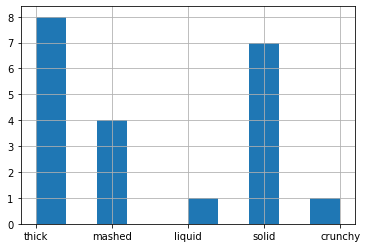

In [51]:
X_train.consistency.hist()

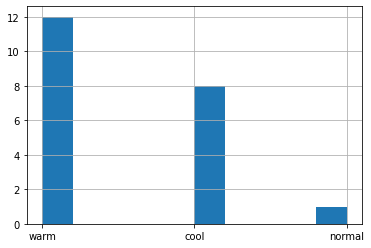

In [52]:
X_train.temperature.hist()

In [53]:
# Feature columns
tf_columns = []

for name in feature_names:
  vocabulary = X_train[name].unique()
  tf_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(name, vocabulary))

In [54]:
# Input functions
def make_input_fn(X, y, num_epochs=None, shuffle=True):
  DATASET_SIZE = len(y)

  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    
    if shuffle:
      dataset = dataset.shuffle(DATASET_SIZE)

    # For training, cycle through dataset as many times as needed.
    dataset = dataset.repeat(num_epochs)

    # Use entire batch since we have a small dataset and it should fit in memory.
    dataset = dataset.batch(DATASET_SIZE)
    
    return dataset
  
  return input_fn

def make_in_memory_input_fn(X, y):
  """
  Input function for in-memory training. In-memory input_fn does not use
  batching.
  """
  y = np.expand_dims(y, axis=1)

  def input_fn():
    return dict(X), y

  return input_fn

train_input_fn = make_input_fn(X_train, y_train)
in_memory_train_input_fn = make_in_memory_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)


# [Linear Classifier](https://www.tensorflow.org/tutorials/estimator/linear)


In [13]:
# Linear estimator
linear_est = tf.estimator.LinearClassifier(feature_columns=tf_columns)
linear_est.train(train_input_fn)
linear_est_result = linear_est.evaluate(eval_input_fn)

clear_output()
print(linear_est_result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmps37h0iyg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmps37h0iyg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 50.9887
INFO:tensorflow:loss = 0.10245588, step = 100 (1.967 sec)
INFO:tensorflow:global_step/sec: 205.541
INFO:tensorflow:loss = 0.05438871, step = 200 (0.482 sec)
INFO:tensorflow:global_step/sec: 218.007
INFO:tensorflow:loss = 0.03690592, step = 300 (0.459 sec)
INFO:tensorflow:global_step/sec: 196.079
INFO:tensorflow:loss = 0.027902732, step = 400 (0.510 sec)
INFO:tensorflow

KeyboardInterrupt: ignored

In [ ]:
# Predicted probabilities.
linear_est_predictions = list(linear_est.predict(eval_input_fn))
linear_est_probabilities = pd.Series([pred['probabilities'][1] for pred in linear_est_predictions])

linear_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

In [ ]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, linear_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# Boosted Trees

In [55]:
boosted_trees_est = tf.estimator.BoostedTreesClassifier(
    tf_columns,
    # "center_bias=True" forces the model to make an initial prediction before
    # using any features (e.g. use the mean of the training labels for
    # regression or log odds for classification when using cross entropy loss).
    # This is necessary for DFCs.
    center_bias=True,
    max_depth=3,
    n_batches_per_layer=1,
    n_trees=50,
    train_in_memory=True, 
)

# The model will stop training once the specified number of trees is built, not
# based on the number of steps.
boosted_trees_est.train(in_memory_train_input_fn, max_steps=100)

# Eval.
result = boosted_trees_est.evaluate(eval_input_fn)
clear_output()
print(pd.Series(result))

accuracy                  0.714286
accuracy_baseline         0.571429
auc                       0.750000
auc_precision_recall      0.858333
average_loss              0.544803
label/mean                0.571429
loss                      0.544803
precision                 0.666667
prediction/mean           0.665987
recall                    1.000000
global_step             100.000000
dtype: float64


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpam9qa2t1/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


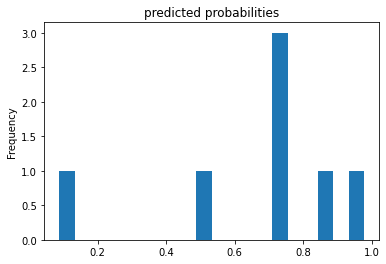

In [56]:
# Predicted probabilities.
boosted_trees_est_predictions = list(boosted_trees_est.predict(eval_input_fn))
boosted_trees_est_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_est_predictions])

boosted_trees_est_probabilities.plot(kind='hist', bins=20, title='predicted probabilities')

(0.0, 1.05)

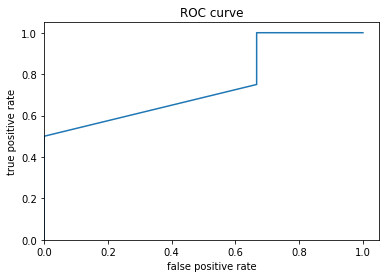

In [57]:
# ROC curve.

fpr, tpr, _ = roc_curve(y_test, boosted_trees_est_probabilities)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)

# [Local Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#local_interpretability)

In [70]:
boosted_trees_predictions = list(boosted_trees_est.experimental_predict_with_explanations(eval_input_fn))
labels = y_test.values
boosted_trees_probabilities = pd.Series([pred['probabilities'][1] for pred in boosted_trees_predictions])
boosted_trees_dfc = pd.DataFrame([pred['dfc'] for pred in boosted_trees_predictions])
boosted_trees_dfc.describe().T


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpam9qa2t1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tens

,count,mean,std,min,25%,50%,75%,max
almond,7.0,0.094558,0.290723,-0.483002,0.057322,0.158165,0.233531,0.40504
anchovy,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
apple,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
arugula,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
banana,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
bay_leaf,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
bean,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
bell_pepper,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
black_pepper,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
blueberry,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [71]:
# Sum of DFCs + bias == probabality.
bias = boosted_trees_predictions[0]['bias']
dfc_prob = boosted_trees_dfc.sum(axis=1) + bias
np.testing.assert_almost_equal(dfc_prob.values, boosted_trees_probabilities.values)


In [82]:
# Boilerplate code for plotting :)

dfeval = X_test + y_test

def _get_color(value):
    """To make positive DFCs plot green, negative DFCs plot red."""
    green, red = sns.color_palette()[2:4]
    if value >= 0: return green
    return red

def _add_feature_values(feature_values, ax):
    """Display feature's values on left of plot."""
    x_coord = ax.get_xlim()[0]
    OFFSET = 0.15
    for y_coord, (feat_name, feat_val) in enumerate(feature_values.items()):
        t = plt.text(x_coord, y_coord - OFFSET, '{}'.format(feat_val), size=12)
        t.set_bbox(dict(facecolor='white', alpha=0.5))
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_weight('bold')
    t = plt.text(x_coord, y_coord + 1 - OFFSET, 'feature\nvalue',
    fontproperties=font, size=12)

def plot_example(example):
  TOP_N = 8 # View top 8 features.
  sorted_ix = example.abs().sort_values()[-TOP_N:].index  # Sort by magnitude.
  example = example[sorted_ix]
  colors = example.map(_get_color).tolist()
  ax = example.to_frame().plot(kind='barh',
                          color=[colors],
                          legend=None,
                          alpha=0.75,
                          figsize=(10,6))
  ax.grid(False, axis='y')
  ax.set_yticklabels(ax.get_yticklabels(), size=14)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)
  return ax

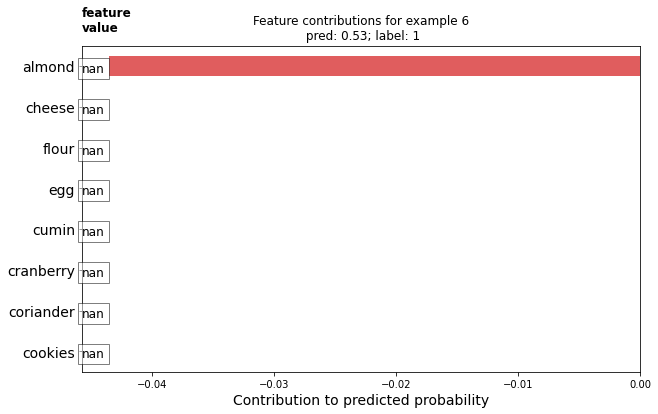

In [85]:
# Plot results.

# Index of example to choose.
boosted_trees_ID = 6

# Example in evaluation set.
example = boosted_trees_dfc.iloc[boosted_trees_ID]

# View top n features.
TOP_N = 12

sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = plot_example(example)
ax.set_title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
ax.set_xlabel('Contribution to predicted probability', size=14)
plt.show()


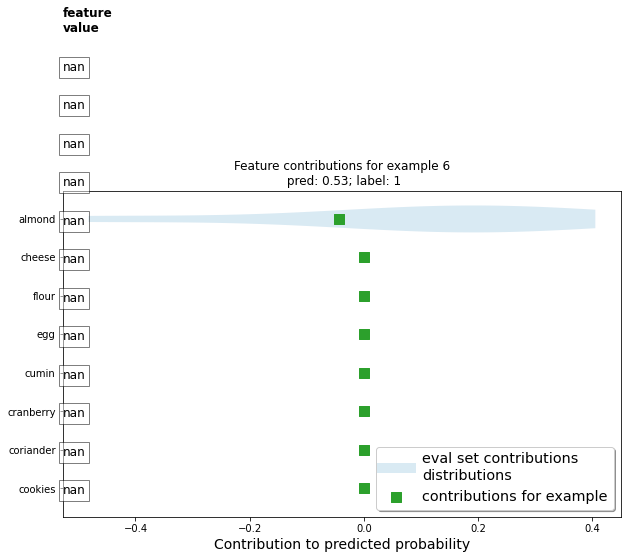

In [87]:
# Boilerplate plotting code.
def dist_violin_plot(df_dfc, ID):
  # Initialize plot.
  fig, ax = plt.subplots(1, 1, figsize=(10, 6))

  # Create example dataframe.
  TOP_N = 8  # View top 8 features.
  example = boosted_trees_dfc.iloc[ID]
  ix = example.abs().sort_values()[-TOP_N:].index
  example = example[ix]
  example_df = example.to_frame(name='dfc')

  # Add contributions of entire distribution.
  parts=ax.violinplot([df_dfc[w] for w in ix],
                 vert=False,
                 showextrema=False,
                 widths=0.7,
                 positions=np.arange(len(ix)))
  face_color = sns_colors[0]
  alpha = 0.15
  for pc in parts['bodies']:
      pc.set_facecolor(face_color)
      pc.set_alpha(alpha)

  # Add feature values.
  _add_feature_values(dfeval.iloc[ID][sorted_ix], ax)

  # Add local contributions.
  ax.scatter(example,
              np.arange(example.shape[0]),
              color=sns.color_palette()[2],
              s=100,
              marker="s",
              label='contributions for example')

  # Legend
  # Proxy plot, to show violinplot dist on legend.
  ax.plot([0,0], [1,1], label='eval set contributions\ndistributions',
          color=face_color, alpha=alpha, linewidth=10)
  legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large',
                     frameon=True)
  legend.get_frame().set_facecolor('white')

  # Format plot.
  ax.set_yticks(np.arange(example.shape[0]))
  ax.set_yticklabels(example.index)
  ax.grid(False, axis='y')
  ax.set_xlabel('Contribution to predicted probability', size=14)


dist_violin_plot(boosted_trees_dfc, boosted_trees_ID)
plt.title('Feature contributions for example {}\n pred: {:1.2f}; label: {}'\
             .format(boosted_trees_ID, boosted_trees_probabilities[boosted_trees_ID], labels[boosted_trees_ID]))
plt.show()


# [Global Interpretability of Boosted Trees](https://www.tensorflow.org/tutorials/estimator/boosted_trees_model_understanding#global_feature_importances)

In [88]:
# Gain-based feature importances

importances = boosted_trees_est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh',
          color=sns_colors[0],
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')


ValueError: ignored

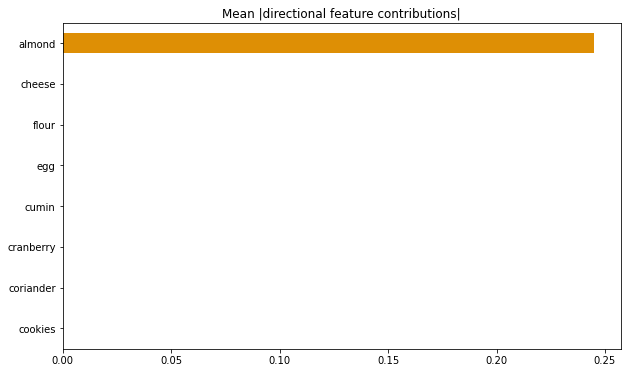

In [89]:
# Average absolute DFCs

dfc_mean = boosted_trees_dfc.abs().mean()
N = 8
sorted_ix = dfc_mean.abs().sort_values()[-N:].index  # Average and sort by absolute.
ax = dfc_mean[sorted_ix].plot(kind='barh',
                       color=sns_colors[1],
                       title='Mean |directional feature contributions|',
                       figsize=(10, 6))
ax.grid(False, axis='y')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


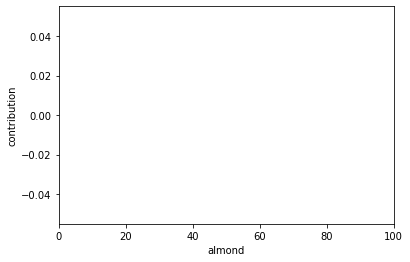

In [90]:
## You can also see how DFCs vary as a feature value varies.

FEATURE = 'almond'
feature = pd.Series(boosted_trees_dfc[FEATURE].values, index=dfeval[FEATURE].values).sort_index()
ax = sns.regplot(feature.index.values, feature.values, lowess=True)
ax.set_ylabel('contribution')
ax.set_xlabel(FEATURE)
ax.set_xlim(0, 100)
plt.show()


In [95]:
# Permutation feature importance

def permutation_importances(est, X_eval, y_eval, metric, features):
    """Column by column, shuffle values and observe effect on eval set.

    source: http://explained.ai/rf-importance/index.html
    A similar approach can be done during training. See "Drop-column importance"
    in the above article."""
    baseline = metric(est, X_eval, y_eval)
    imp = []
    for col in features:
        save = X_eval[col].copy()
        X_eval[col] = np.random.permutation(X_eval[col])
        m = metric(est, X_eval, y_eval)
        X_eval[col] = save
        imp.append(baseline - m)
    return np.array(imp)


def accuracy_metric(est, X, y):
    """TensorFlow estimator accuracy."""
    eval_input_fn = make_input_fn(X, y=y, shuffle=False, num_epochs=1)
    return boosted_trees_est.evaluate(input_fn=eval_input_fn)['accuracy']


importances = permutation_importances(
    boosted_trees_est,
    dfeval,
    y_test,
    accuracy_metric,
    feature_names)
df_imp = pd.Series(importances, index=feature_names)

sorted_ix = df_imp.abs().sort_values().index
ax = df_imp[sorted_ix][-5:].plot(kind='barh', color=sns_colors[2], figsize=(10, 6))
ax.grid(False, axis='y')
ax.set_title('Permutation feature importance')
plt.show()


TypeError: ignored